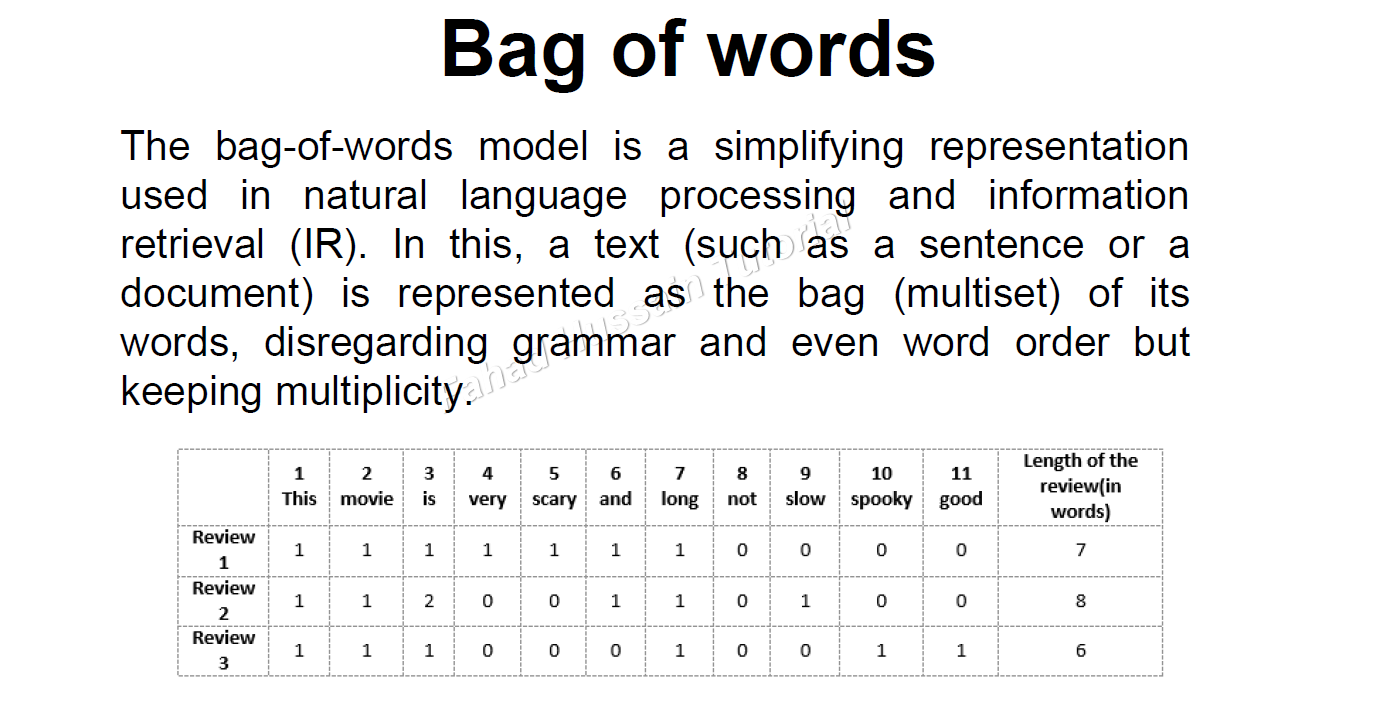

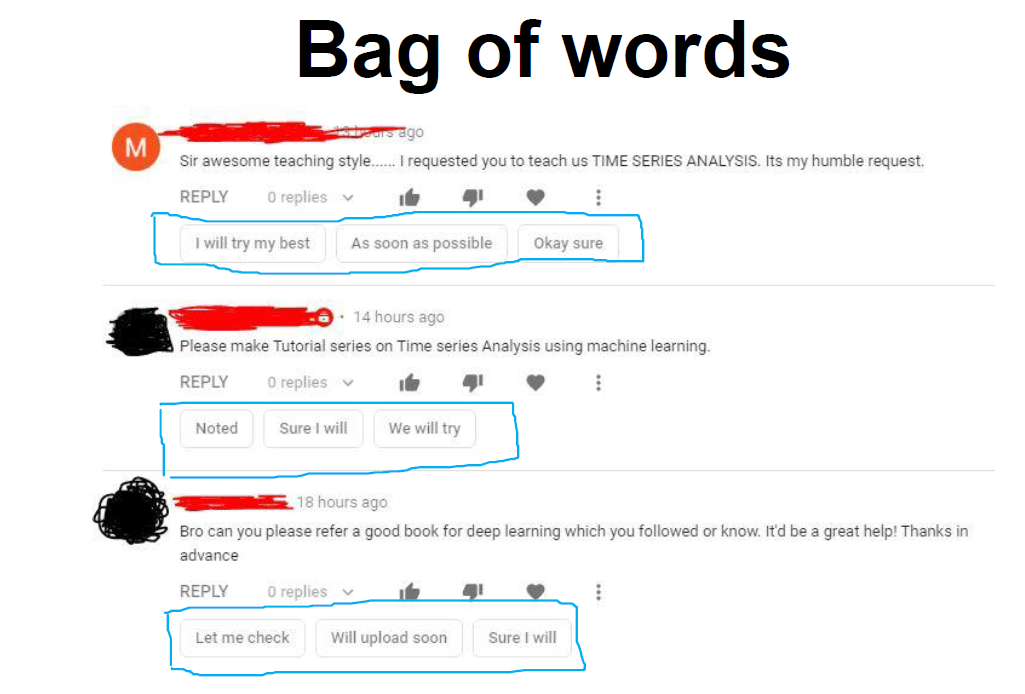

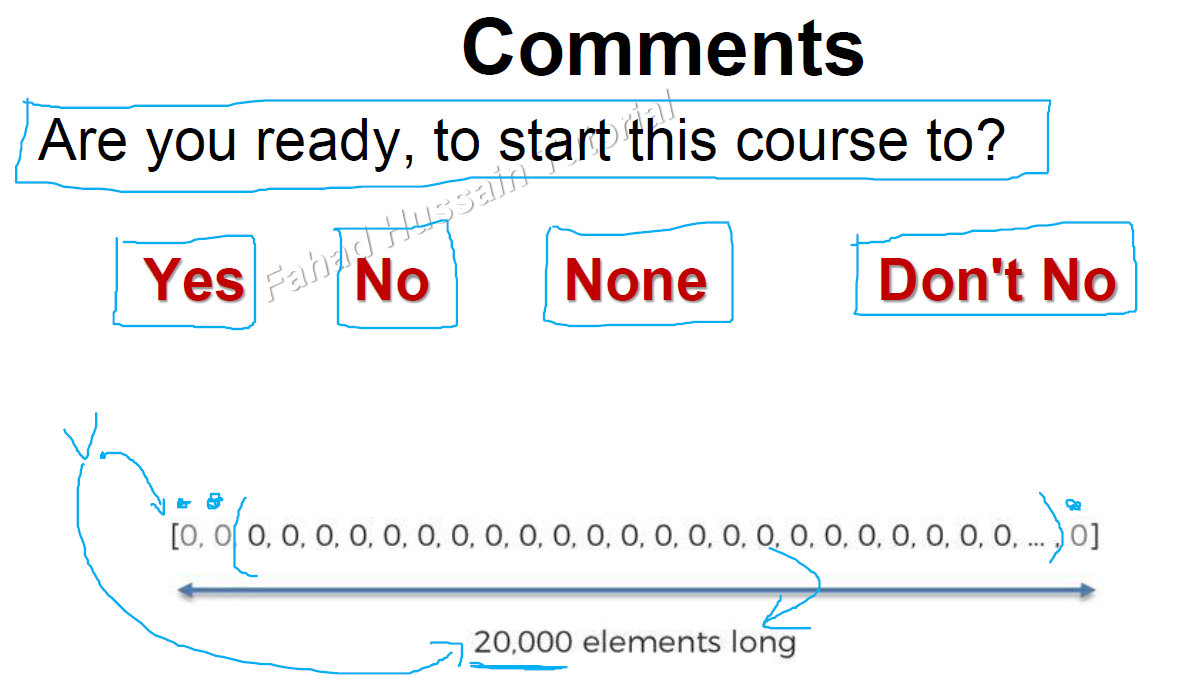

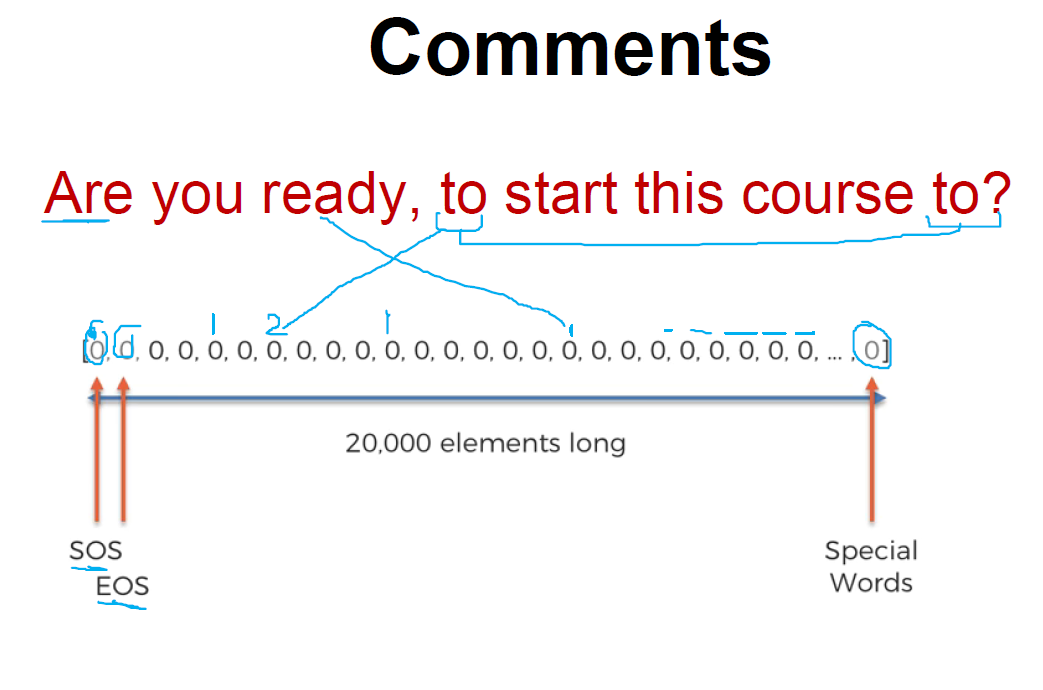

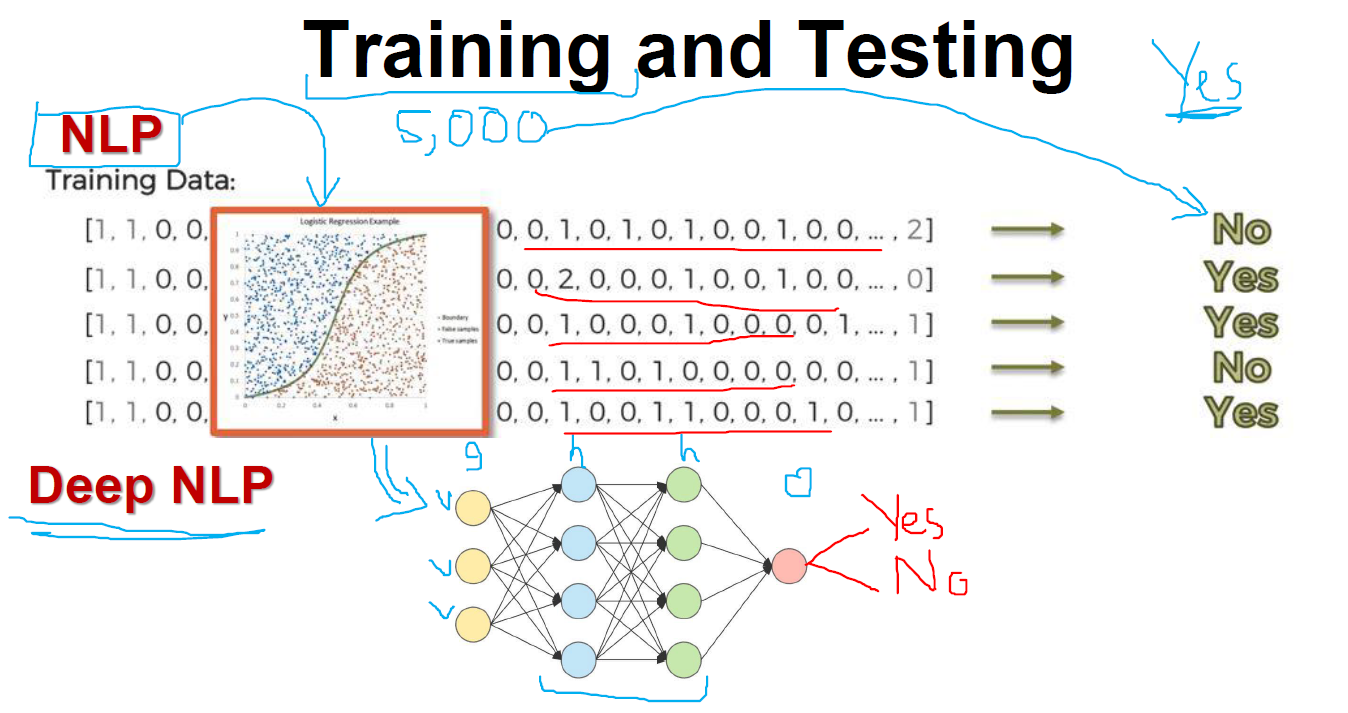

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)


{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [ ]:
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


re - regular expression

sab se phle regular expression ko use krte hue apne sentence ko token ma convert krne k lye aik method bnaya hua hai

aur method bnane k bad un words ko sort kr k written krwaen ge jo sentence ma aen ge

def tokenize_sentences(sentences) - yahan sentence aik parameter hai js k andar hum complete string likhn ge

us string ko ye token ma convert kre ga listed form ma

aur uske bad hmein written kr k de ga tokenize_sentences method k zariye

In [ ]:
import numpy as np
import re

'''The first function we will implement is to extract the words from a document using regular expressions.
 As we do so, we will be converting all words to lower case and exclude our stop words.'''

def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words

uske bad hum ne regular expression ka use kya

aur regular expression ka use krte hue sentence ko split kr rahe hain

it means jo b data hmare string ma mojood hoga, hum usko break krn ge regular expression k zariye se

lower case ma convert krn ge ta k wo clean hojae aur uski reading easy hojae, hmare model k lye ya us method k lye jo

jo agey humne bnana hai, ta k sentence clarify hojae token pr

In [ ]:
'''Next, we implement our tokenize_sentences function. This function builds our vocabulary by looping through
 all our documents (sentences), extracting the words from each, removing duplicates using the set function and 
 returning a sorted list of words.'''

def extract_words(sentence):
    ignore_words = ['a']
    words = re.sub("[^w]", " ",  sentence).split() #nltk.word_tokenize(sentence)
    words_cleaned = [w.lower() for w in words if w not in ignore_words]
    return words_cleaned   

iske bad humne bag of words ka method bnaya

bag of words alot of zero's k sath hta hai

bag = np.zeros(len(words))

hum ne nlp ma hum ne len(words) k mutabik zero ko count kr lya hai k itne num of zero's is ma hne chahyn

phr nested loop k through bag of words ma aik aik word ko count kr rahe hain, - (for sw in sentence_words:)

aur usi ko apne method pe return krwa rahe hain - return np.array(bag)

In [ ]:
def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

In [ ]:
'''Our last function is the implementation of the bag of words model. This function takes an input of a sentence 
and words (our vocabulary). It then extracts the words from the input sentence using the previously defined function. 
It creates a vector of zeros using numpy zeros function with a length of the number of words in our vocabulary.'''


sentences = ["Machine learning is great","Natural Language Processing is a complex field",
"Natural Language Processing is used in machine learning"]

In [ ]:
vocabulary = tokenize_sentences(sentences)
bagofwords("Machine learning is great", vocabulary)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 

train_data_features = vectorizer.fit_transform(sentences)

vectorizer.transform(["Machine learning is great","Natural Language Processing is a complex field",
"Natural Language Processing is used in machine learning"]).toarray()


array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
________________________________********************__________________________

SyntaxError: ignored